In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('loan_data.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# Filling missing values
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
pd.unique(data['Dependents'])

array(['0', '1', '2', '3+'], dtype=object)

In [10]:
pd.unique(data['Education'])

array(['Graduate', 'Not Graduate'], dtype=object)

In [11]:
pd.unique(data['Property_Area'])

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [12]:
# Converting categories to numbers
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
data['Married'] = data['Married'].map({'No':0, 'Yes':1})
data['Dependents'] = data['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
data['Education'] = data['Education'].map({'Graduate':0, 'Not Graduate':1})
data['Self_Employed'] = data['Self_Employed'].map({'No':0, 'Yes':1})
data['Property_Area'] = data['Property_Area'].map({'Urban':0, 'Rural':1, 'Semiurban':2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

In [13]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1


In [14]:
# Normalization of variables
for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min())/(data[i].max() - data[i].min())
    

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,0.0,1.0
1,LP001003,0.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.5,0.0
2,LP001005,0.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,0.0,1.0
3,LP001006,0.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,0.0,1.0
4,LP001008,0.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,0.0,1.0


## Building model

In [16]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data = data.drop('Loan_ID', axis=1)
X = data.drop('Loan_Status', axis= 1)
y = data['Loan_Status']

In [18]:
X.shape, y.shape

((614, 11), (614,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = data['Loan_Status'], random_state=10, test_size=0.2)

In [20]:
import keras
import tensorflow as tf

In [21]:
from keras.models import Sequential

In [22]:
from keras.layers import InputLayer, Dense

In [23]:
# Network architecture
input_neurons = X_train.shape[1]
output_neurons = 1 # Binary Classification
# Taking 2 hidden layers
# Number of neurons in each hidden layer:
hidden_neurons = [10, 5]

# Model architecture
model = Sequential()
model.add(InputLayer(input_shape = input_neurons))
model.add(Dense(units = hidden_neurons[0], activation = 'relu'))
model.add(Dense(units = hidden_neurons[1], activation = 'relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [27]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=75)

Epoch 1/75
16/16 [==============================] - 0s 10ms/step - loss: 0.6376 - accuracy: 0.6864 - val_loss: 0.6203 - val_accuracy: 0.6911
Epoch 2/75
16/16 [==============================] - ETA: 0s - loss: 0.5458 - accuracy: 0.81 - 0s 1ms/step - loss: 0.6329 - accuracy: 0.6864 - val_loss: 0.6175 - val_accuracy: 0.6911
Epoch 3/75
16/16 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.6864 - val_loss: 0.6150 - val_accuracy: 0.6911
Epoch 4/75
16/16 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.6864 - val_loss: 0.6131 - val_accuracy: 0.6911
Epoch 5/75
16/16 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.6864 - val_loss: 0.6109 - val_accuracy: 0.6911
Epoch 6/75
16/16 [==============================] - 0s 941us/step - loss: 0.6212 - accuracy: 0.6864 - val_loss: 0.6090 - val_accuracy: 0.6911
Epoch 7/75
16/16 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.6864 - val_loss: 0.607

Epoch 59/75
16/16 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8086 - val_loss: 0.4800 - val_accuracy: 0.8130
Epoch 60/75
16/16 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.8086 - val_loss: 0.4799 - val_accuracy: 0.8130
Epoch 61/75
16/16 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.8086 - val_loss: 0.4783 - val_accuracy: 0.8130
Epoch 62/75
16/16 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.8086 - val_loss: 0.4786 - val_accuracy: 0.8130
Epoch 63/75
16/16 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.8086 - val_loss: 0.4777 - val_accuracy: 0.8130
Epoch 64/75
16/16 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.8086 - val_loss: 0.4783 - val_accuracy: 0.8130
Epoch 65/75
16/16 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.8086 - val_loss: 0.4783 - val_accuracy: 0.8130
Epoch 66/75
1

In [28]:
# Evaluating model performance
pred = model.predict(X_test) > 0.5
accuracy_score(y_test, pred)

0.8130081300813008

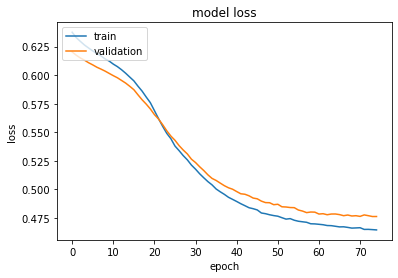

In [29]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()